# Analysing Spotify Data on Christmas Day (25/12)

Every day since Jan-1-2017, Spotify tracks the top 200 songs streamed each day. 

Each song that charts in the Top 200 are given various attributes such as:
1. Current Rank
2. URI (Link to the song)
3. Artist name(s)
4. Track name
5. Source (most of the time, it's record label)
6. Highest Rank reached
7. Previous day's rank
8. Days on chart since first entry
9. Number of streams

In particular, Christmas Day has always been met with a huge resurgence in daily streams for many Christmas songs. Hence, this notebook will take a dive into various trends on the Top 200 songs streamed every year on Christmas since 2017

### Null Hypothesis: The rise in streams for Christmas songs on the Global Spotify Chart do not have any effect on the stream counts of non-Christmas songs on the Global Spotify Chart

Credits to Spotify: https://charts.spotify.com/charts/overview/global for providing this data

## Download Libraries

In [1]:
library(readr)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Viewing .csv Files

In [2]:
christmas_data_2017 <- read.csv(file = 'regional-global-daily-2017-12-25.csv')
head(christmas_data_2017, 10)

ï..rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
1,spotify:track:0bYg9bo50gSsH3LtXe2SQn,Mariah Carey,All I Want for Christmas Is You,Columbia,1,1,45,6467590
2,spotify:track:2FRnf9qhLbvw8fu4IBXx78,Wham!,Last Christmas,Epic,2,2,38,5122502
3,spotify:track:1hvpDAxZPKjKztOc72sv06,Band Aid,Do They Know It's Christmas? - 1984 Version,EMI,3,5,31,3699892
4,spotify:track:3T7dNA7O8c3Axj5WyDNcH3,Brenda Lee,Rockin' Around The Christmas Tree,MCA Nashville,4,11,32,3589792
5,spotify:track:7wGoVu4Dady5GV0Sv4UIsx,"Post Malone, 21 Savage",rockstar (feat. 21 Savage),Republic Records,1,4,102,3552559
6,spotify:track:0lLdorYw7lVrJydTINhWdI,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,Reprise,3,3,32,3395172
7,spotify:track:5hslUAKq9I9CG2bAulFkHN,Andy Williams,It's the Most Wonderful Time of the Year,Columbia/Legacy,7,10,32,3295423
8,spotify:track:3zJw3rugfpVrmBeDDnUYzy,"John Lennon, Yoko Ono",Happy Xmas (War Is Over) - Remastered 2010,EMI Catalogue,7,7,27,3065523
9,spotify:track:0ofbQMrRDsUaVKq2mGLEAb,"Camila Cabello, Young Thug",Havana (feat. Young Thug),Syco Music/Epic,2,9,144,3002472
10,spotify:track:4so0Wek9Ig1p6CRCHuINwW,"Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra",White Christmas,Geffen,10,13,27,2991621


In [3]:
christmas_data_2018 <- read.csv(file = 'regional-global-daily-2018-12-25.csv')
head(christmas_data_2018, 10)

ï..rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
1,spotify:track:0bYg9bo50gSsH3LtXe2SQn,Mariah Carey,All I Want for Christmas Is You,Columbia,1,1,101,8449779
2,spotify:track:2FRnf9qhLbvw8fu4IBXx78,Wham!,Last Christmas,Epic,2,2,80,6914425
3,spotify:track:2EjXfH91m7f8HiJN1yQg97,Brenda Lee,Rockin' Around The Christmas Tree,MCA Nashville,3,7,71,5786608
4,spotify:track:0lLdorYw7lVrJydTINhWdI,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,Reprise,3,4,71,5759859
5,spotify:track:0lizgQ7Qw35od7CYaoMBZb,Ariana Grande,Santa Tell Me,Universal Records,3,3,71,5709933
6,spotify:track:7vQbuQcyTflfCIOu3Uzzya,Bobby Helms,Jingle Bell Rock,Geffen,5,5,68,5615454
7,spotify:track:5hslUAKq9I9CG2bAulFkHN,Andy Williams,It's the Most Wonderful Time of the Year,Columbia/Legacy,6,6,67,5547420
8,spotify:track:0247StOpd3AkeBQzANX4Zf,Band Aid,Do They Know It's Christmas? - 1984 Version,EMI,3,9,66,5310700
9,spotify:track:3zJw3rugfpVrmBeDDnUYzy,"John Lennon, Yoko Ono",Happy Xmas (War Is Over) - Remastered 2010,EMI Catalogue,7,8,60,4742966
10,spotify:track:7Lbxvt42JsNSKVCaN63qhD,Paul McCartney,Wonderful Christmastime - Edited Version / Remastered 2011,Paul McCartney Catalog,10,10,58,4616702


In [4]:
christmas_data_2019 <- read.csv(file = 'regional-global-daily-2019-12-25.csv')
head(christmas_data_2019, 10)

ï..rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
1,spotify:track:0bYg9bo50gSsH3LtXe2SQn,Mariah Carey,All I Want for Christmas Is You,Columbia,1,1,161,9268219
2,spotify:track:2FRnf9qhLbvw8fu4IBXx78,Wham!,Last Christmas,Epic,2,2,128,7587790
3,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,Dance Monkey,Elektra (NEK),1,4,161,5890362
4,spotify:track:3hBXvHLlTHvnbwrPbeoyAj,Bobby Helms,Jingle Bell Rock,Geffen,4,6,103,5791997
5,spotify:track:2EjXfH91m7f8HiJN1yQg97,Brenda Lee,Rockin' Around The Christmas Tree,MCA Nashville,3,7,106,5766937
6,spotify:track:0lLdorYw7lVrJydTINhWdI,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,Reprise,3,5,108,5749029
7,spotify:track:1IcR6RlgvDczfvoWJSSY2A,Andy Williams,It's the Most Wonderful Time of the Year,Columbia,6,8,101,5600458
8,spotify:track:0lizgQ7Qw35od7CYaoMBZb,Ariana Grande,Santa Tell Me,Universal Records,3,3,117,5526779
9,spotify:track:3zJw3rugfpVrmBeDDnUYzy,"John Lennon, Yoko Ono",Happy Xmas (War Is Over) - Remastered 2010,EMI Catalogue,7,9,89,4800481
10,spotify:track:7taXf5odg9xCAZERYfyOkS,JosÃ© Feliciano,Feliz Navidad,RCA Records Label,10,10,82,4795801


In [5]:
christmas_data_2020 <- read.csv(file = 'regional-global-daily-2020-12-25.csv')
head(christmas_data_2020, 10)

ï..rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
1,spotify:track:0bYg9bo50gSsH3LtXe2SQn,Mariah Carey,All I Want for Christmas Is You,Columbia,1,1,221,13573228
2,spotify:track:2FRnf9qhLbvw8fu4IBXx78,Wham!,Last Christmas,Epic,2,2,180,12415012
3,spotify:track:2EjXfH91m7f8HiJN1yQg97,Brenda Lee,Rockin' Around The Christmas Tree,MCA Nashville,3,6,149,10893485
4,spotify:track:7vQbuQcyTflfCIOu3Uzzya,Bobby Helms,Jingle Bell Rock,Geffen,4,5,146,10680793
5,spotify:track:0lLdorYw7lVrJydTINhWdI,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,Reprise,3,4,152,10023249
6,spotify:track:0lizgQ7Qw35od7CYaoMBZb,Ariana Grande,Santa Tell Me,Universal Records,3,3,165,9918267
7,spotify:track:1IcR6RlgvDczfvoWJSSY2A,Andy Williams,It's the Most Wonderful Time of the Year,Columbia,6,7,144,9720517
8,spotify:track:3nAp4IvdMPPWEH9uuXFFV5,Kelly Clarkson,Underneath the Tree,RCA Records Label,8,8,110,7869110
9,spotify:track:3qCeq0rWK67SoBDgFd2sId,JosÃ© Feliciano,Feliz Navidad,RCA Records Label,9,10,118,7550148
10,spotify:track:4kKdvXD0ez7jp1296JmAts,"Frank Sinatra, B. Swanson Quartet",Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet),Columbia/Legacy,10,15,131,7132448


In [6]:
christmas_data_2021 <- read.csv(file = 'regional-global-daily-2021-12-25.csv')
head(christmas_data_2021, 10)

ï..rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
1,spotify:track:0bYg9bo50gSsH3LtXe2SQn,Mariah Carey,All I Want for Christmas Is You,Columbia,1,1,282,13051932
2,spotify:track:2FRnf9qhLbvw8fu4IBXx78,Wham!,Last Christmas,Epic,2,2,228,11471321
3,spotify:track:2EjXfH91m7f8HiJN1yQg97,Brenda Lee,Rockin' Around The Christmas Tree,MCA Nashville,3,3,188,10539295
4,spotify:track:7vQbuQcyTflfCIOu3Uzzya,Bobby Helms,Jingle Bell Rock,Geffen,4,4,185,10214805
5,spotify:track:0lLdorYw7lVrJydTINhWdI,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,Reprise,3,5,192,9269512
6,spotify:track:1IcR6RlgvDczfvoWJSSY2A,Andy Williams,It's the Most Wonderful Time of the Year,Columbia,6,7,182,8927978
7,spotify:track:0lizgQ7Qw35od7CYaoMBZb,Ariana Grande,Santa Tell Me,Universal Records,3,6,204,8034492
8,spotify:track:3qCeq0rWK67SoBDgFd2sId,JosÃ© Feliciano,Feliz Navidad,RCA Records Label,8,8,152,7996203
9,spotify:track:7fUYUcWy853HS8YJn0b3Sr,The Ronettes,Sleigh Ride,Legacy Recordings,9,12,124,7077436
10,spotify:track:4kKdvXD0ez7jp1296JmAts,"Frank Sinatra, B. Swanson Quartet",Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet),Columbia/Legacy,10,17,163,6726952


In [7]:
christmas_data_2022 <- read.csv(file = 'regional-global-daily-2022-12-25.csv')
head(christmas_data_2022, 10)

ï..rank,uri,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams
1,spotify:track:0bYg9bo50gSsH3LtXe2SQn,Mariah Carey,All I Want for Christmas Is You,Columbia,1,1,343,16216593
2,spotify:track:2EjXfH91m7f8HiJN1yQg97,Brenda Lee,Rockin' Around The Christmas Tree,MCA Nashville,2,3,234,14975108
3,spotify:track:2FRnf9qhLbvw8fu4IBXx78,Wham!,Last Christmas,Epic,2,2,277,14632883
4,spotify:track:7vQbuQcyTflfCIOu3Uzzya,Bobby Helms,Jingle Bell Rock,Geffen,4,4,231,13602157
5,spotify:track:1rv46mRwDqMEhOBZ7vODg3,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,Reprise,3,5,236,11558194
6,spotify:track:1IcR6RlgvDczfvoWJSSY2A,Andy Williams,It's the Most Wonderful Time of the Year,Columbia,6,6,221,11074414
7,spotify:track:3qCeq0rWK67SoBDgFd2sId,JosÃ© Feliciano,Feliz Navidad,RCA Records Label,7,8,188,10976553
8,spotify:track:2uFaJJtFpPDc5Pa95XzTvg,Dean Martin,Let It Snow! Let It Snow! Let It Snow!,Capitol Records,8,9,162,9966002
9,spotify:track:0lizgQ7Qw35od7CYaoMBZb,Ariana Grande,Santa Tell Me,Universal Records,3,7,247,9579916
10,spotify:track:6tjituizSxwSmBB5vtgHZE,Michael BublÃ©,Holly Jolly Christmas,Reprise,10,10,192,8583288


## Data Cleaning

To analyse the data trends over the past 6 Christmases, we are going to clean the data and add relevant columns to improve the analysis capabilities

3 Modifications will be made

Firstly, the 'rank' column needs to be changed as it includes a special character.

Secondary, the 'source' and 'uri' column are dropped as it is not needed in our analysis.

Thirdly, to better understand if said songs are Christmas songs, a column called "christmas_song" will be added. Two values will be in that column: "yes" and "no".

In [8]:
colnames(christmas_data_2017)[1] <- "rank"
colnames(christmas_data_2018)[1] <- "rank"
colnames(christmas_data_2019)[1] <- "rank"
colnames(christmas_data_2020)[1] <- "rank"
colnames(christmas_data_2021)[1] <- "rank"
colnames(christmas_data_2022)[1] <- "rank"

christmas_2017_updated <- mutate(christmas_data_2017, christmas_song = 'yes') 
christmas_2018_updated <- mutate(christmas_data_2018, christmas_song = 'yes')
christmas_2019_updated <- mutate(christmas_data_2019, christmas_song = 'yes')
christmas_2020_updated <- mutate(christmas_data_2020, christmas_song = 'yes')
christmas_2021_updated <- mutate(christmas_data_2021, christmas_song = 'yes')
christmas_2022_updated <- mutate(christmas_data_2022, christmas_song = 'yes')

christmas_2017_updated <- subset(christmas_2017_updated, select = c(-uri, -source))
christmas_2018_updated <- subset(christmas_2018_updated, select = c(-uri, -source))
christmas_2019_updated <- subset(christmas_2019_updated, select = c(-uri, -source))
christmas_2020_updated <- subset(christmas_2020_updated, select = c(-uri, -source))
christmas_2021_updated <- subset(christmas_2021_updated, select = c(-uri, -source))
christmas_2022_updated <- subset(christmas_2022_updated, select = c(-uri, -source))

### Inspect Data Frames to ensure that all the edits are done correctly

In [9]:
christmas_2017_updated
christmas_2018_updated
christmas_2019_updated
christmas_2020_updated
christmas_2021_updated
christmas_2022_updated

rank,artist_names,track_name,peak_rank,previous_rank,days_on_chart,streams,christmas_song
1,Mariah Carey,All I Want for Christmas Is You,1,1,45,6467590,yes
2,Wham!,Last Christmas,2,2,38,5122502,yes
3,Band Aid,Do They Know It's Christmas? - 1984 Version,3,5,31,3699892,yes
4,Brenda Lee,Rockin' Around The Christmas Tree,4,11,32,3589792,yes
5,"Post Malone, 21 Savage",rockstar (feat. 21 Savage),1,4,102,3552559,yes
6,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,3,3,32,3395172,yes
7,Andy Williams,It's the Most Wonderful Time of the Year,7,10,32,3295423,yes
8,"John Lennon, Yoko Ono",Happy Xmas (War Is Over) - Remastered 2010,7,7,27,3065523,yes
9,"Camila Cabello, Young Thug",Havana (feat. Young Thug),2,9,144,3002472,yes
10,"Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra",White Christmas,10,13,27,2991621,yes


rank,artist_names,track_name,peak_rank,previous_rank,days_on_chart,streams,christmas_song
1,Mariah Carey,All I Want for Christmas Is You,1,1,101,8449779,yes
2,Wham!,Last Christmas,2,2,80,6914425,yes
3,Brenda Lee,Rockin' Around The Christmas Tree,3,7,71,5786608,yes
4,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,3,4,71,5759859,yes
5,Ariana Grande,Santa Tell Me,3,3,71,5709933,yes
6,Bobby Helms,Jingle Bell Rock,5,5,68,5615454,yes
7,Andy Williams,It's the Most Wonderful Time of the Year,6,6,67,5547420,yes
8,Band Aid,Do They Know It's Christmas? - 1984 Version,3,9,66,5310700,yes
9,"John Lennon, Yoko Ono",Happy Xmas (War Is Over) - Remastered 2010,7,8,60,4742966,yes
10,Paul McCartney,Wonderful Christmastime - Edited Version / Remastered 2011,10,10,58,4616702,yes


rank,artist_names,track_name,peak_rank,previous_rank,days_on_chart,streams,christmas_song
1,Mariah Carey,All I Want for Christmas Is You,1,1,161,9268219,yes
2,Wham!,Last Christmas,2,2,128,7587790,yes
3,Tones And I,Dance Monkey,1,4,161,5890362,yes
4,Bobby Helms,Jingle Bell Rock,4,6,103,5791997,yes
5,Brenda Lee,Rockin' Around The Christmas Tree,3,7,106,5766937,yes
6,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,3,5,108,5749029,yes
7,Andy Williams,It's the Most Wonderful Time of the Year,6,8,101,5600458,yes
8,Ariana Grande,Santa Tell Me,3,3,117,5526779,yes
9,"John Lennon, Yoko Ono",Happy Xmas (War Is Over) - Remastered 2010,7,9,89,4800481,yes
10,JosÃ© Feliciano,Feliz Navidad,10,10,82,4795801,yes


rank,artist_names,track_name,peak_rank,previous_rank,days_on_chart,streams,christmas_song
1,Mariah Carey,All I Want for Christmas Is You,1,1,221,13573228,yes
2,Wham!,Last Christmas,2,2,180,12415012,yes
3,Brenda Lee,Rockin' Around The Christmas Tree,3,6,149,10893485,yes
4,Bobby Helms,Jingle Bell Rock,4,5,146,10680793,yes
5,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,3,4,152,10023249,yes
6,Ariana Grande,Santa Tell Me,3,3,165,9918267,yes
7,Andy Williams,It's the Most Wonderful Time of the Year,6,7,144,9720517,yes
8,Kelly Clarkson,Underneath the Tree,8,8,110,7869110,yes
9,JosÃ© Feliciano,Feliz Navidad,9,10,118,7550148,yes
10,"Frank Sinatra, B. Swanson Quartet",Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet),10,15,131,7132448,yes


rank,artist_names,track_name,peak_rank,previous_rank,days_on_chart,streams,christmas_song
1,Mariah Carey,All I Want for Christmas Is You,1,1,282,13051932,yes
2,Wham!,Last Christmas,2,2,228,11471321,yes
3,Brenda Lee,Rockin' Around The Christmas Tree,3,3,188,10539295,yes
4,Bobby Helms,Jingle Bell Rock,4,4,185,10214805,yes
5,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,3,5,192,9269512,yes
6,Andy Williams,It's the Most Wonderful Time of the Year,6,7,182,8927978,yes
7,Ariana Grande,Santa Tell Me,3,6,204,8034492,yes
8,JosÃ© Feliciano,Feliz Navidad,8,8,152,7996203,yes
9,The Ronettes,Sleigh Ride,9,12,124,7077436,yes
10,"Frank Sinatra, B. Swanson Quartet",Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet),10,17,163,6726952,yes


rank,artist_names,track_name,peak_rank,previous_rank,days_on_chart,streams,christmas_song
1,Mariah Carey,All I Want for Christmas Is You,1,1,343,16216593,yes
2,Brenda Lee,Rockin' Around The Christmas Tree,2,3,234,14975108,yes
3,Wham!,Last Christmas,2,2,277,14632883,yes
4,Bobby Helms,Jingle Bell Rock,4,4,231,13602157,yes
5,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,3,5,236,11558194,yes
6,Andy Williams,It's the Most Wonderful Time of the Year,6,6,221,11074414,yes
7,JosÃ© Feliciano,Feliz Navidad,7,8,188,10976553,yes
8,Dean Martin,Let It Snow! Let It Snow! Let It Snow!,8,9,162,9966002,yes
9,Ariana Grande,Santa Tell Me,3,7,247,9579916,yes
10,Michael BublÃ©,Holly Jolly Christmas,10,10,192,8583288,yes


Obviously, not all songs are Christmas-themed. Now non-Christmas songs will have their row value modified in the "christmas_song" column to reflect as "no"

In [10]:
non_christmas_song_rankings_2017 <- c(5,9,14,20,22,25,26,27,32,34,36,37,39,40,41,46,49,50,51,52,55,56,58,62,64,65,66,67,72,73,74,76,80,81,83,86,92,96,97,98,99,100,102,106,109,113,116,120,121,123,125,126,127,129,130,131,132,133,134,135,136,137,139,142,145,147,148,149,150,152,153,155,159,160,164,165,166,168,170,172,174,175,176,178,181,183,184,188,189,191,192,193,194,196,198,199,200)

for (x in non_christmas_song_rankings_2017) {
    christmas_2017_updated$christmas_song[christmas_2017_updated$rank == x] <- 'no'
}

christmas_2017_updated

rank,artist_names,track_name,peak_rank,previous_rank,days_on_chart,streams,christmas_song
1,Mariah Carey,All I Want for Christmas Is You,1,1,45,6467590,yes
2,Wham!,Last Christmas,2,2,38,5122502,yes
3,Band Aid,Do They Know It's Christmas? - 1984 Version,3,5,31,3699892,yes
4,Brenda Lee,Rockin' Around The Christmas Tree,4,11,32,3589792,yes
5,"Post Malone, 21 Savage",rockstar (feat. 21 Savage),1,4,102,3552559,no
6,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,3,3,32,3395172,yes
7,Andy Williams,It's the Most Wonderful Time of the Year,7,10,32,3295423,yes
8,"John Lennon, Yoko Ono",Happy Xmas (War Is Over) - Remastered 2010,7,7,27,3065523,yes
9,"Camila Cabello, Young Thug",Havana (feat. Young Thug),2,9,144,3002472,no
10,"Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra",White Christmas,10,13,27,2991621,yes


In [11]:
non_christmas_song_rankings_2018 <- c(16,23,24,29,36,39,45,47,50,51,52,53,69,70,71,73,77,79,81,83,84,86,88,89,91,93,94,95,96,97,99,103,104,111,114,115,118,120,122,124,125,127,130,133,134,138,140,141,144,145,146,147,150,151,152,153,154,155,156,158,159,160,164,165,166,167,171,173,174,175,176,177,178,180,181,182,183,184,189,191,193,195,196,197)

for (x in non_christmas_song_rankings_2018) {
    christmas_2018_updated$christmas_song[christmas_2018_updated$rank == x] <- 'no'
}

christmas_2018_updated

rank,artist_names,track_name,peak_rank,previous_rank,days_on_chart,streams,christmas_song
1,Mariah Carey,All I Want for Christmas Is You,1,1,101,8449779,yes
2,Wham!,Last Christmas,2,2,80,6914425,yes
3,Brenda Lee,Rockin' Around The Christmas Tree,3,7,71,5786608,yes
4,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,3,4,71,5759859,yes
5,Ariana Grande,Santa Tell Me,3,3,71,5709933,yes
6,Bobby Helms,Jingle Bell Rock,5,5,68,5615454,yes
7,Andy Williams,It's the Most Wonderful Time of the Year,6,6,67,5547420,yes
8,Band Aid,Do They Know It's Christmas? - 1984 Version,3,9,66,5310700,yes
9,"John Lennon, Yoko Ono",Happy Xmas (War Is Over) - Remastered 2010,7,8,60,4742966,yes
10,Paul McCartney,Wonderful Christmastime - Edited Version / Remastered 2011,10,10,58,4616702,yes


In [12]:
non_christmas_song_rankings_2019 <- c(3,18,22,29,31,36,39,41,42,43,44,48,55,60,61,65,71,76,80,81,83,84,88,89,90,91,93,94,95,96,102,106,108,111,117,118,119,120,124,125,128,129,131,132,133,136,137,138,140,143,144,147,149,150,151,156,157,158,160,161,163,164,165,166,167,170,177,178,181,182,184,185,186,189,191,192,193,199)

for (x in non_christmas_song_rankings_2019) {
    christmas_2019_updated$christmas_song[christmas_2019_updated$rank == x] <- 'no'
}

christmas_2019_updated

rank,artist_names,track_name,peak_rank,previous_rank,days_on_chart,streams,christmas_song
1,Mariah Carey,All I Want for Christmas Is You,1,1,161,9268219,yes
2,Wham!,Last Christmas,2,2,128,7587790,yes
3,Tones And I,Dance Monkey,1,4,161,5890362,no
4,Bobby Helms,Jingle Bell Rock,4,6,103,5791997,yes
5,Brenda Lee,Rockin' Around The Christmas Tree,3,7,106,5766937,yes
6,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,3,5,108,5749029,yes
7,Andy Williams,It's the Most Wonderful Time of the Year,6,8,101,5600458,yes
8,Ariana Grande,Santa Tell Me,3,3,117,5526779,yes
9,"John Lennon, Yoko Ono",Happy Xmas (War Is Over) - Remastered 2010,7,9,89,4800481,yes
10,JosÃ© Feliciano,Feliz Navidad,10,10,82,4795801,yes


In [13]:
non_christmas_song_rankings_2020 <- c(21,33,39,44,49,60,61,66,68,74,78,79,89,90,93,95,97,98,104,114,115,116,124,125,126,127,128,129,130,131,132,133,134,136,138,139,140,142,145,146,147,150,153,156,158,161,163,168,169,171,172,173,175,176,177,180,183,184,186,188,189,190,191,193,194,195,197,198)

for (x in non_christmas_song_rankings_2020) {
    christmas_2020_updated$christmas_song[christmas_2020_updated$rank == x] <- 'no'
}

christmas_2020_updated

rank,artist_names,track_name,peak_rank,previous_rank,days_on_chart,streams,christmas_song
1,Mariah Carey,All I Want for Christmas Is You,1,1,221,13573228,yes
2,Wham!,Last Christmas,2,2,180,12415012,yes
3,Brenda Lee,Rockin' Around The Christmas Tree,3,6,149,10893485,yes
4,Bobby Helms,Jingle Bell Rock,4,5,146,10680793,yes
5,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,3,4,152,10023249,yes
6,Ariana Grande,Santa Tell Me,3,3,165,9918267,yes
7,Andy Williams,It's the Most Wonderful Time of the Year,6,7,144,9720517,yes
8,Kelly Clarkson,Underneath the Tree,8,8,110,7869110,yes
9,JosÃ© Feliciano,Feliz Navidad,9,10,118,7550148,yes
10,"Frank Sinatra, B. Swanson Quartet",Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet),10,15,131,7132448,yes


In [14]:
non_christmas_song_rankings_2021 <- c(30,33,41,44,45,48,49,59,69,79,81,84,85,93,96,97,99,101,103,110,111,112,115,116,119,121,123,126,127,128,132,133,135,136,137,139,141,142,145,150,151,152,155,158,160,161,162,167,168,172,174,175,177,178,179,182,183,184,185,186,188,190,192,193,194,195,198,199,200)

for (x in non_christmas_song_rankings_2021) {
    christmas_2021_updated$christmas_song[christmas_2021_updated$rank == x] <- 'no'
}

christmas_2021_updated

rank,artist_names,track_name,peak_rank,previous_rank,days_on_chart,streams,christmas_song
1,Mariah Carey,All I Want for Christmas Is You,1,1,282,13051932,yes
2,Wham!,Last Christmas,2,2,228,11471321,yes
3,Brenda Lee,Rockin' Around The Christmas Tree,3,3,188,10539295,yes
4,Bobby Helms,Jingle Bell Rock,4,4,185,10214805,yes
5,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,3,5,192,9269512,yes
6,Andy Williams,It's the Most Wonderful Time of the Year,6,7,182,8927978,yes
7,Ariana Grande,Santa Tell Me,3,6,204,8034492,yes
8,JosÃ© Feliciano,Feliz Navidad,8,8,152,7996203,yes
9,The Ronettes,Sleigh Ride,9,12,124,7077436,yes
10,"Frank Sinatra, B. Swanson Quartet",Let It Snow! Let It Snow! Let It Snow! (with The B. Swanson Quartet),10,17,163,6726952,yes


In [15]:
non_christmas_song_rankings_2022 <- c(29,42,43,50,51,56,64,69,71,73,75,79,84,91,92,94,95,96,97,98,99,100,102,104,107,110,111,112,114,115,121,122,126,127,128,133,134,140,141,144,146,147,148,151,152,154,155,157,160,161,162,163,164,165,169,170,171,173,174,175,178,185,186,188,189,191,195,198,199,200)

for (x in non_christmas_song_rankings_2022) {
    christmas_2022_updated$christmas_song[christmas_2022_updated$rank == x] <- 'no'
}

christmas_2022_updated

rank,artist_names,track_name,peak_rank,previous_rank,days_on_chart,streams,christmas_song
1,Mariah Carey,All I Want for Christmas Is You,1,1,343,16216593,yes
2,Brenda Lee,Rockin' Around The Christmas Tree,2,3,234,14975108,yes
3,Wham!,Last Christmas,2,2,277,14632883,yes
4,Bobby Helms,Jingle Bell Rock,4,4,231,13602157,yes
5,Michael BublÃ©,It's Beginning to Look a Lot like Christmas,3,5,236,11558194,yes
6,Andy Williams,It's the Most Wonderful Time of the Year,6,6,221,11074414,yes
7,JosÃ© Feliciano,Feliz Navidad,7,8,188,10976553,yes
8,Dean Martin,Let It Snow! Let It Snow! Let It Snow!,8,9,162,9966002,yes
9,Ariana Grande,Santa Tell Me,3,7,247,9579916,yes
10,Michael BublÃ©,Holly Jolly Christmas,10,10,192,8583288,yes


Let's take a look at the number of Christmas songs that have charted each year. Also, the proportion between Christmas and non-Christmas songs will be identified.

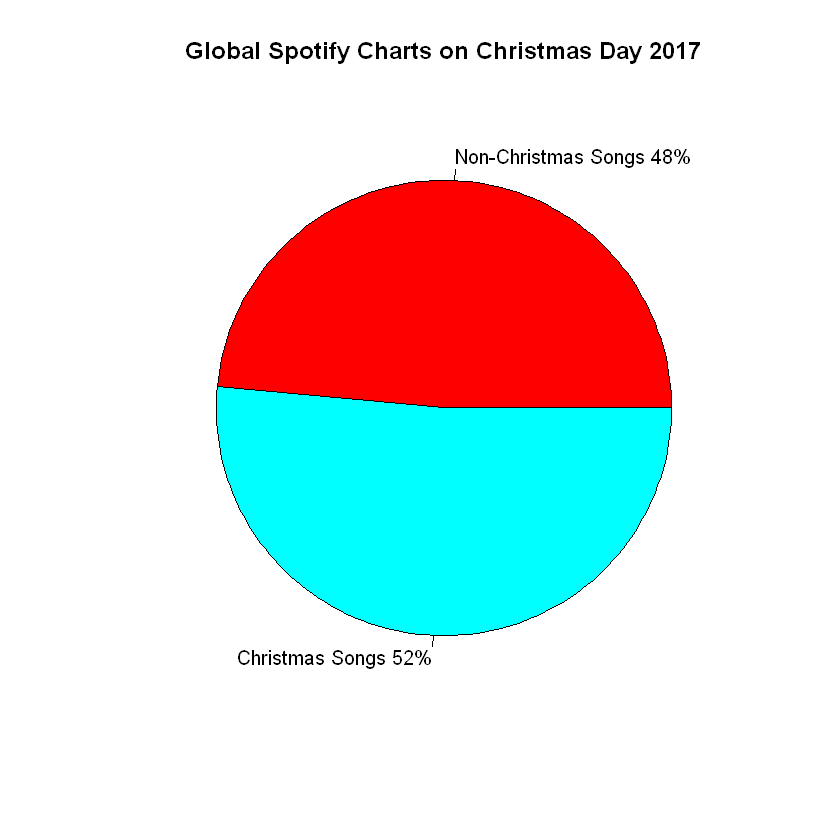

In [16]:
# 2017
# Pie Chart with Percentages
slices <- c(length(non_christmas_song_rankings_2017), 200 - length(non_christmas_song_rankings_2017))
labels <- c("Non-Christmas Songs", "Christmas Songs")
pie_chart <- round(slices/sum(slices)*100)
labels <- paste(labels, pie_chart) # add percents to labels
labels <- paste(labels,"%",sep="") # ad % to labels
pie(slices,labels = labels, col=rainbow(length(labels)),
   main="Global Spotify Charts on Christmas Day 2017")

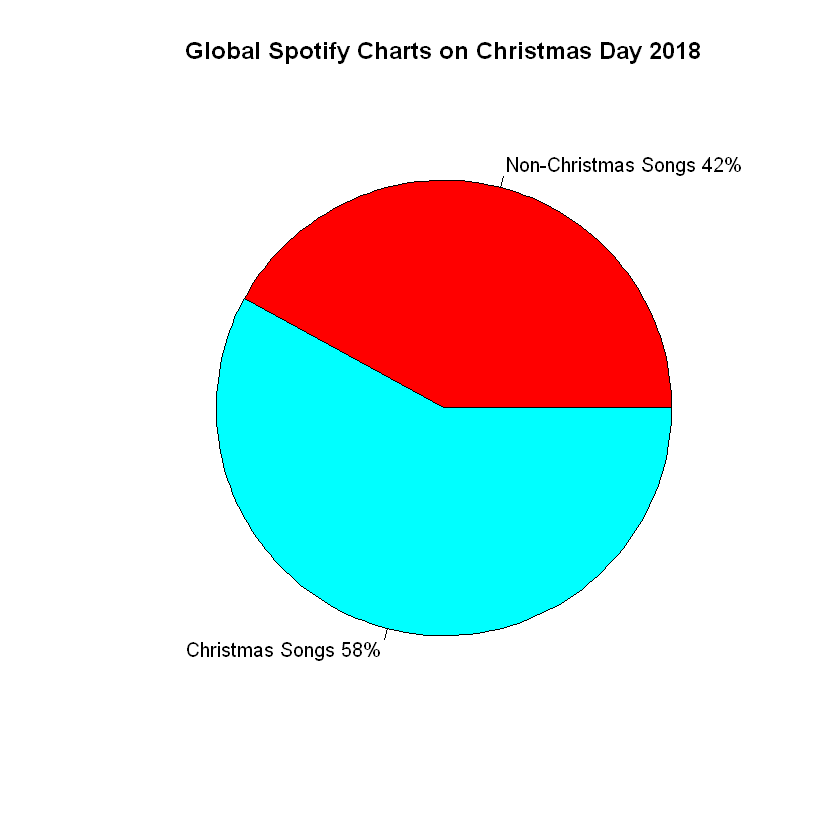

In [17]:
# 2018
# Pie Chart with Percentages
slices <- c(length(non_christmas_song_rankings_2018), 200 - length(non_christmas_song_rankings_2018))
labels <- c("Non-Christmas Songs", "Christmas Songs")
pie_chart <- round(slices/sum(slices)*100)
labels <- paste(labels, pie_chart) # add percents to labels
labels <- paste(labels,"%",sep="") # ad % to labels
pie(slices,labels = labels, col=rainbow(length(labels)),
   main="Global Spotify Charts on Christmas Day 2018")

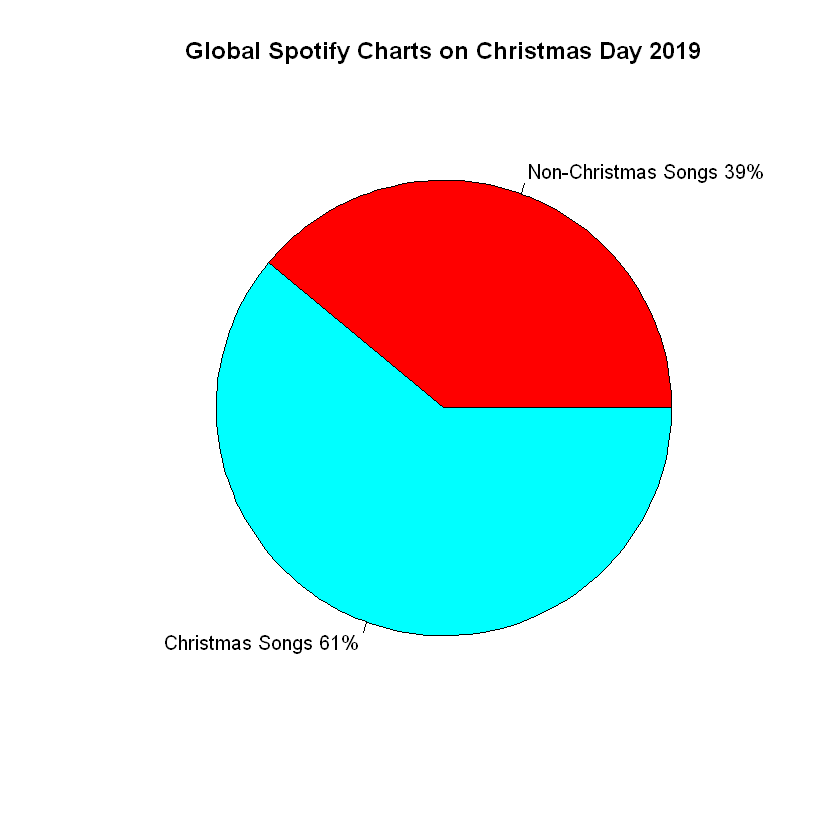

In [18]:
# 2019
# Pie Chart with Percentages
slices <- c(length(non_christmas_song_rankings_2019), 200 - length(non_christmas_song_rankings_2019))
labels <- c("Non-Christmas Songs", "Christmas Songs")
pie_chart <- round(slices/sum(slices)*100)
labels <- paste(labels, pie_chart) # add percents to labels
labels <- paste(labels,"%",sep="") # ad % to labels
pie(slices,labels = labels, col=rainbow(length(labels)),
   main="Global Spotify Charts on Christmas Day 2019")

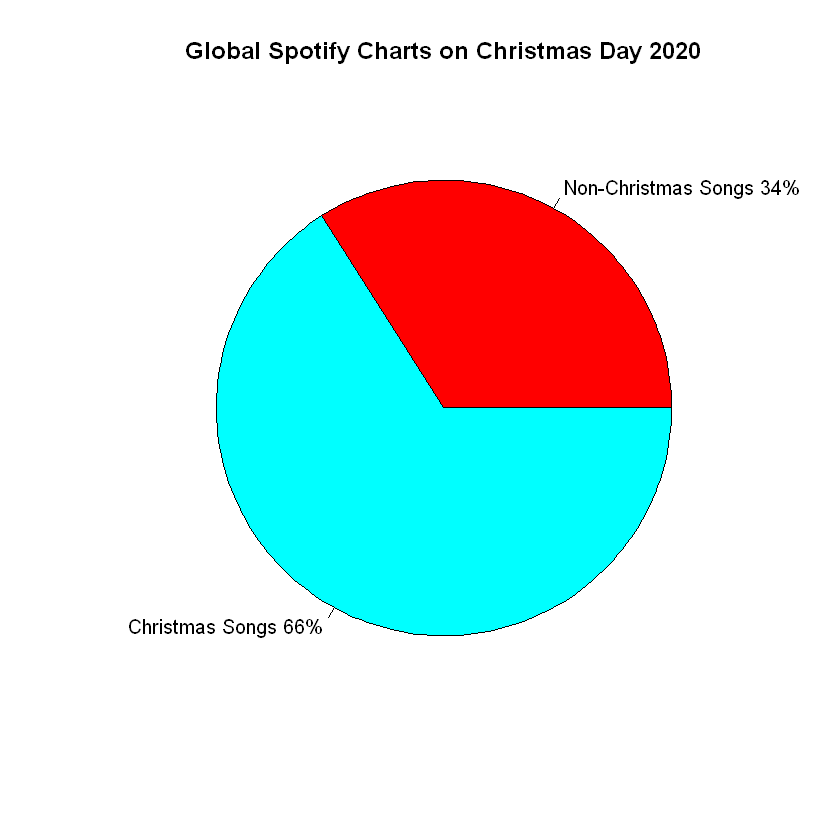

In [19]:
# 2020
# Pie Chart with Percentages
slices <- c(length(non_christmas_song_rankings_2020), 200 - length(non_christmas_song_rankings_2020))
labels <- c("Non-Christmas Songs", "Christmas Songs")
pie_chart <- round(slices/sum(slices)*100)
labels <- paste(labels, pie_chart) # add percents to labels
labels <- paste(labels,"%",sep="") # ad % to labels
pie(slices,labels = labels, col=rainbow(length(labels)),
   main="Global Spotify Charts on Christmas Day 2020")

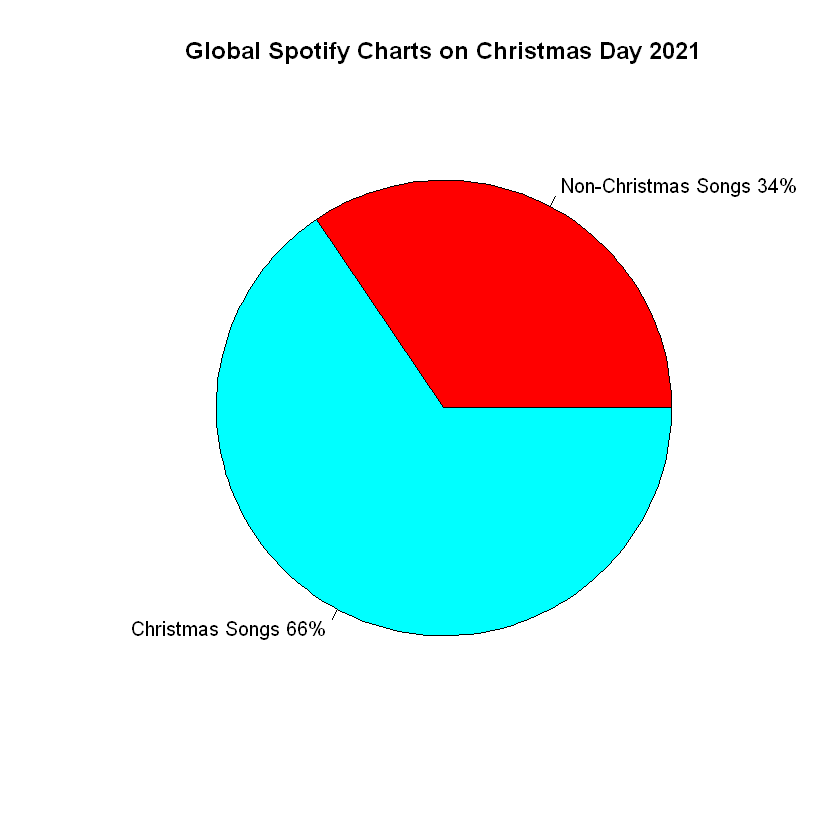

In [20]:
# 2021
# Pie Chart with Percentages
slices <- c(length(non_christmas_song_rankings_2021), 200 - length(non_christmas_song_rankings_2021))
labels <- c("Non-Christmas Songs", "Christmas Songs")
pie_chart <- round(slices/sum(slices)*100)
labels <- paste(labels, pie_chart) # add percents to labels
labels <- paste(labels,"%",sep="") # ad % to labels
pie(slices,labels = labels, col=rainbow(length(labels)),
   main="Global Spotify Charts on Christmas Day 2021")

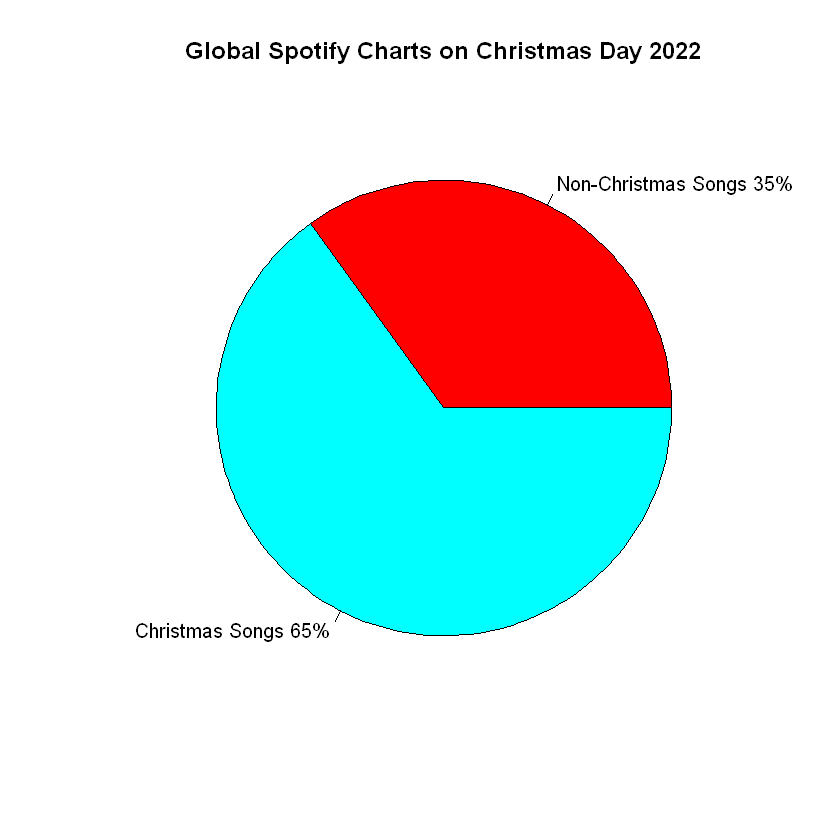

In [21]:
# 2022
# Pie Chart with Percentages
slices <- c(length(non_christmas_song_rankings_2022), 200 - length(non_christmas_song_rankings_2022))
labels <- c("Non-Christmas Songs", "Christmas Songs")
pie_chart <- round(slices/sum(slices)*100)
labels <- paste(labels, pie_chart) # add percents to labels
labels <- paste(labels,"%",sep="") # ad % to labels
pie(slices,labels = labels, col=rainbow(length(labels)),
   main="Global Spotify Charts on Christmas Day 2022")

## Analysis
There is an upward trend of more Christmas songs dominating the Spotify Charts on Christmas Day
It was almost an even amount of non-Christmas and Christmas songs back in 2017.
However, the proportion of Christmas songs have stagnated at about 65-66% for the past 3 years.
This could indicate a limit on the percentage of Christmas songs hitting the charts every Christmas.

Now let's look at the trend regarding the number of streams on the Spotify Chart

In [22]:
# Max Streams
max_streams_2017 <- max(christmas_2017_updated$streams)
max_streams_2018 <- max(christmas_2018_updated$streams)
max_streams_2019 <- max(christmas_2019_updated$streams)
max_streams_2020 <- max(christmas_2020_updated$streams)
max_streams_2021 <- max(christmas_2021_updated$streams)
max_streams_2022 <- max(christmas_2022_updated$streams)

# Min Streams
min_streams_2017 <- min(christmas_2017_updated$streams)
min_streams_2018 <- min(christmas_2018_updated$streams)
min_streams_2019 <- min(christmas_2019_updated$streams)
min_streams_2020 <- min(christmas_2020_updated$streams)
min_streams_2021 <- min(christmas_2021_updated$streams)
min_streams_2022 <- min(christmas_2022_updated$streams)

max_trend <- c(max_streams_2017, max_streams_2018, max_streams_2019, max_streams_2020, max_streams_2021, max_streams_2022)
min_trend <- c(min_streams_2017, min_streams_2018, min_streams_2019, min_streams_2020, min_streams_2021, min_streams_2022)

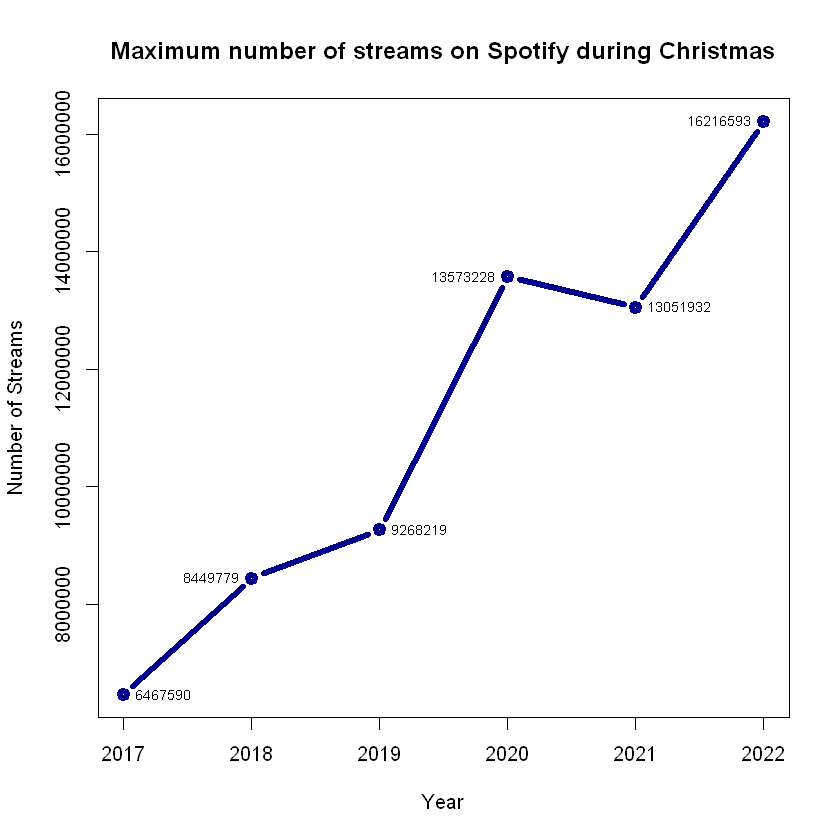

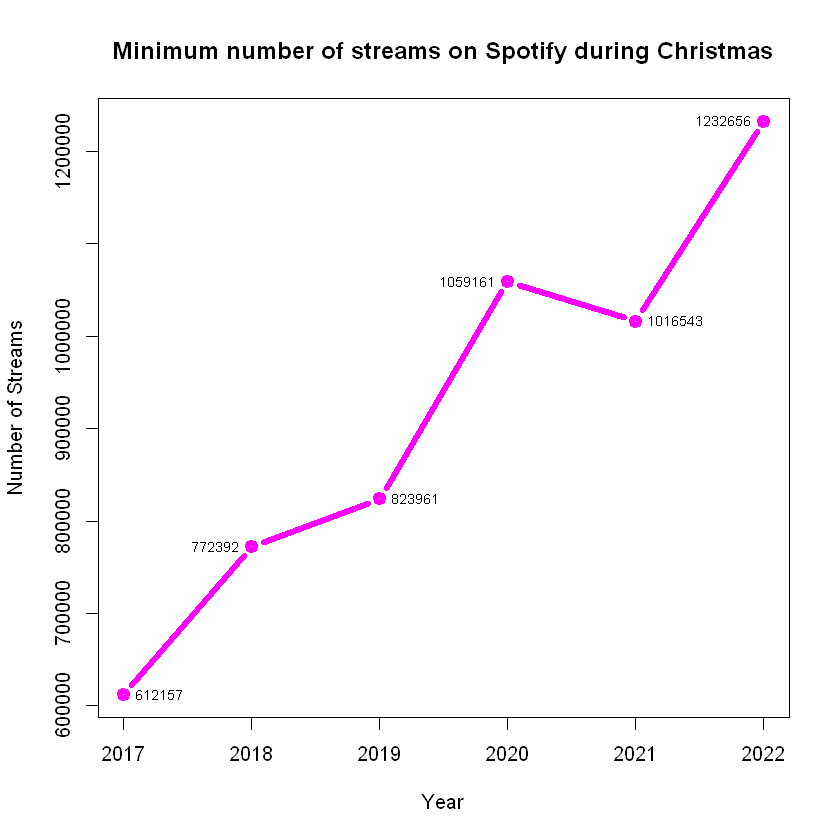

In [23]:
# Plot the line graph to find the min and the max number to enter the Spotify Chart on Christmas Day from 2017-2022
year <- c(2017,2018,2019,2020,2021,2022)

# This helps adjust the labels in a readable manner
# Exact number of streams are labelled on each point
pos_vector <- rep(4, length(max_trend))
pos_vector[max_trend %in% c(max_streams_2018, max_streams_2020, max_streams_2022)] <- 2
options(scipen=999)
plot(year, max_trend, type="b", col="darkblue", lwd=5, xlab="Year", ylab="Number of Streams", main="Maximum number of streams on Spotify during Christmas")
text(year, max_trend, labels=max_trend, cex= 0.7, pos=pos_vector)

pos_vector <- rep(4, length(min_trend))
pos_vector[min_trend %in% c(min_streams_2018, min_streams_2020, min_streams_2022)] <- 2
options(scipen=999)
plot(year, min_trend, type="b", col="magenta", lwd=5, xlab="Year", ylab="Number of Streams", main="Minimum number of streams on Spotify during Christmas")
text(year, min_trend, labels=min_trend, cex= 0.7, pos=pos_vector)

## Analysis
It is very pecuilar to note that the trend between the minimum number and maximum number are almost too similar.

In [24]:
# Note to self:
# Investigate which songs have managed to survive more than one Christmas

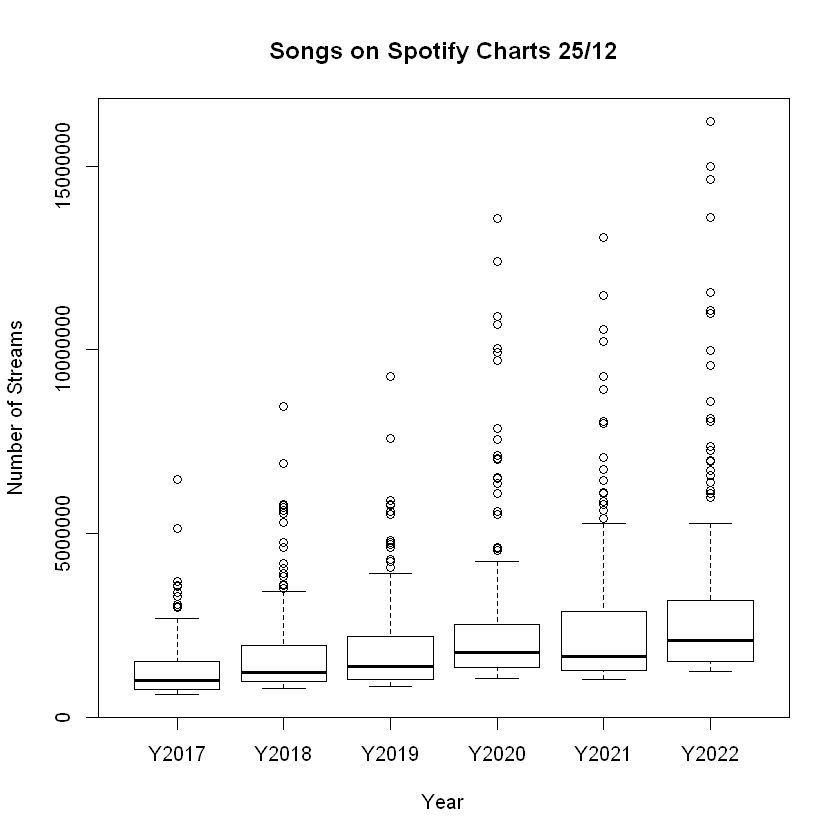

In [25]:
# Boxplot of Streams per Year
data <- data.frame(Y2017 = christmas_2017_updated$streams,
                   Y2018 = christmas_2018_updated$streams,
                   Y2019 = christmas_2019_updated$streams,
                   Y2020 = christmas_2020_updated$streams,
                   Y2021 = christmas_2021_updated$streams,
                   Y2022 = christmas_2022_updated$streams)

options(scipen=999)
boxplot(data, main="Songs on Spotify Charts 25/12", xlab="Year", ylab="Number of Streams")

Now to investigate the quantiles, mean and median for each year

In [26]:
quantiles_2017 <- quantile(christmas_2017_updated$streams, prob = c(0.25,0.5,0.75))
mean_2017 <- mean(christmas_2017_updated$streams)
print(paste("The top 50 songs on the Global Spotify Chart 25/12/2017 have at least", quantiles_2017[3], "streams"))
print(paste("The top 100 songs on the Global Spotify Chart 25/12/2017 have at least", quantiles_2017[2], "streams"))
print(paste("The top 150 songs on the Global Spotify Chart 25/12/2017 have at least", quantiles_2017[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2017 is", mean_2017, "streams"))

[1] "The top 50 songs on the Global Spotify Chart 25/12/2017 have at least 1512914.5 streams"
[1] "The top 100 songs on the Global Spotify Chart 25/12/2017 have at least 1005357 streams"
[1] "The top 150 songs on the Global Spotify Chart 25/12/2017 have at least 760185 streams"
[1] "The average number of streams on the Global Spotify Chart 25/12/2017 is 1270470.24 streams"


In [27]:
quantiles_2018 <- quantile(christmas_2018_updated$streams, prob = c(0.25,0.5,0.75))
mean_2018 <- mean(christmas_2018_updated$streams)
print(paste("The top 50 songs on the Global Spotify Chart 25/12/2018 have at least", quantiles_2018[3], "streams"))
print(paste("The top 100 songs on the Global Spotify Chart 25/12/2018 have at least", quantiles_2018[2], "streams"))
print(paste("The top 150 songs on the Global Spotify Chart 25/12/2018 have at least", quantiles_2018[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2018 is", mean_2018, "streams"))

[1] "The top 50 songs on the Global Spotify Chart 25/12/2018 have at least 1950563.25 streams"
[1] "The top 100 songs on the Global Spotify Chart 25/12/2018 have at least 1218766 streams"
[1] "The top 150 songs on the Global Spotify Chart 25/12/2018 have at least 961375.5 streams"
[1] "The average number of streams on the Global Spotify Chart 25/12/2018 is 1735316.865 streams"


In [28]:
quantiles_2019 <- quantile(christmas_2019_updated$streams, prob = c(0.25,0.5,0.75))
mean_2019 <- mean(christmas_2019_updated$streams)
print(paste("The top 50 songs on the Global Spotify Chart 25/12/2019 have at least", quantiles_2019[3], "streams"))
print(paste("The top 100 songs on the Global Spotify Chart 25/12/2019 have at least", quantiles_2019[2], "streams"))
print(paste("The top 150 songs on the Global Spotify Chart 25/12/2019 have at least", quantiles_2019[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2019 is", mean_2019, "streams"))

[1] "The top 50 songs on the Global Spotify Chart 25/12/2019 have at least 2181853.25 streams"
[1] "The top 100 songs on the Global Spotify Chart 25/12/2019 have at least 1387465.5 streams"
[1] "The top 150 songs on the Global Spotify Chart 25/12/2019 have at least 1029201 streams"
[1] "The average number of streams on the Global Spotify Chart 25/12/2019 is 1905459.145 streams"


In [29]:
quantiles_2020 <- quantile(christmas_2020_updated$streams, prob = c(0.25,0.5,0.75))
mean_2020 <- mean(christmas_2020_updated$streams)
print(paste("The top 50 songs on the Global Spotify Chart 25/12/2020 have at least", quantiles_2020[3], "streams"))
print(paste("The top 100 songs on the Global Spotify Chart 25/12/2020 have at least", quantiles_2020[2], "streams"))
print(paste("The top 150 songs on the Global Spotify Chart 25/12/2020 have at least", quantiles_2020[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2020 is", mean_2020, "streams"))

[1] "The top 50 songs on the Global Spotify Chart 25/12/2020 have at least 2519386.25 streams"
[1] "The top 100 songs on the Global Spotify Chart 25/12/2020 have at least 1754086.5 streams"
[1] "The top 150 songs on the Global Spotify Chart 25/12/2020 have at least 1342431.25 streams"
[1] "The average number of streams on the Global Spotify Chart 25/12/2020 is 2498756.44 streams"


In [30]:
quantiles_2021 <- quantile(christmas_2021_updated$streams, prob = c(0.25,0.5,0.75))
mean_2021 <- mean(christmas_2021_updated$streams)
print(paste("The top 50 songs on the Global Spotify Chart 25/12/2021 have at least", quantiles_2021[3], "streams"))
print(paste("The top 100 songs on the Global Spotify Chart 25/12/2021 have at least", quantiles_2021[2], "streams"))
print(paste("The top 150 songs on the Global Spotify Chart 25/12/2021 have at least", quantiles_2021[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2021 is", mean_2021, "streams"))

[1] "The top 50 songs on the Global Spotify Chart 25/12/2021 have at least 2858726.5 streams"
[1] "The top 100 songs on the Global Spotify Chart 25/12/2021 have at least 1640433 streams"
[1] "The top 150 songs on the Global Spotify Chart 25/12/2021 have at least 1267382.25 streams"
[1] "The average number of streams on the Global Spotify Chart 25/12/2021 is 2500741.88 streams"


In [31]:
quantiles_2022 <- quantile(christmas_2022_updated$streams, prob = c(0.25,0.5,0.75))
mean_2022 <- mean(christmas_2022_updated$streams)
print(paste("The top 50 songs on the Global Spotify Chart 25/12/2022 have at least", quantiles_2022[3], "streams"))
print(paste("The top 100 songs on the Global Spotify Chart 25/12/2022 have at least", quantiles_2022[2], "streams"))
print(paste("The top 150 songs on the Global Spotify Chart 25/12/2022 have at least", quantiles_2022[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2022 is", mean_2022, "streams"))

[1] "The top 50 songs on the Global Spotify Chart 25/12/2022 have at least 3157539 streams"
[1] "The top 100 songs on the Global Spotify Chart 25/12/2022 have at least 2099488.5 streams"
[1] "The top 150 songs on the Global Spotify Chart 25/12/2022 have at least 1519181 streams"
[1] "The average number of streams on the Global Spotify Chart 25/12/2022 is 3002465.585 streams"


In [32]:
mean_trend <- c(mean_2017, mean_2018, mean_2019, mean_2020, mean_2021, mean_2022)

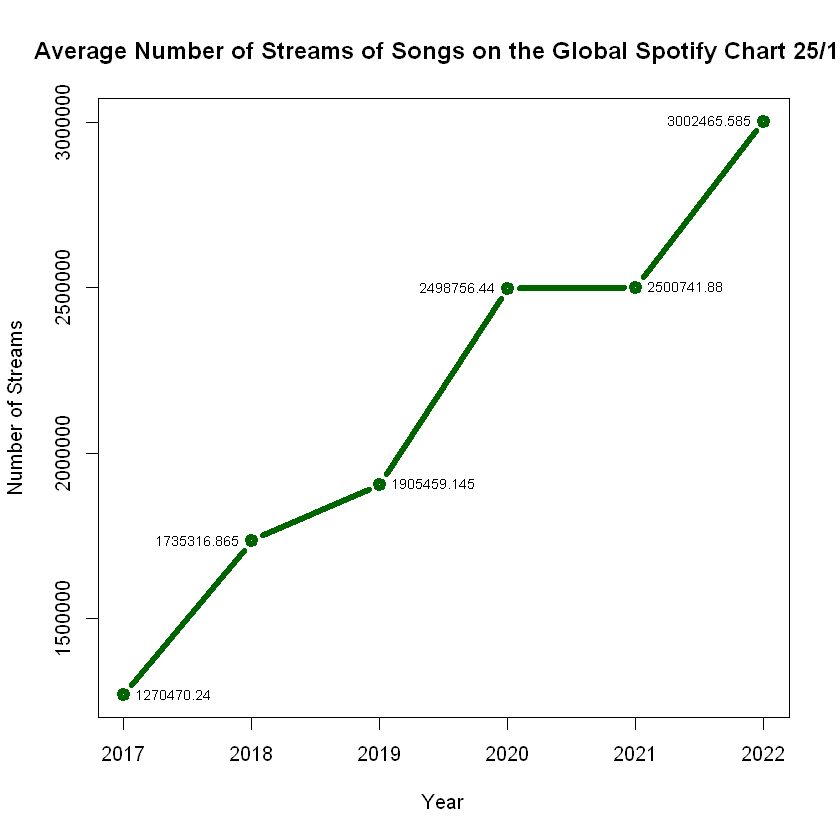

In [33]:
pos_vector <- rep(4, length(mean_trend))
pos_vector[mean_trend %in% c(mean_2018, mean_2020, mean_2022)] <- 2
options(scipen=999)
plot(year, mean_trend, type="b", col="darkgreen", lwd=5, xlab="Year", ylab="Number of Streams", main="Average Number of Streams of Songs on the Global Spotify Chart 25/12")
text(year, mean_trend, labels=mean_trend, cex= 0.7, pos=pos_vector)

In [34]:
quantile_25percentile_trend <- c(quantiles_2017[1], quantiles_2018[1], quantiles_2019[1], quantiles_2020[1], quantiles_2021[1], quantiles_2022[1])
quantile_50percentile_trend <- c(quantiles_2017[2], quantiles_2018[2], quantiles_2019[2], quantiles_2020[2], quantiles_2021[2], quantiles_2022[2])
quantile_75percentile_trend <- c(quantiles_2017[3], quantiles_2018[3], quantiles_2019[3], quantiles_2020[3], quantiles_2021[3], quantiles_2022[3])

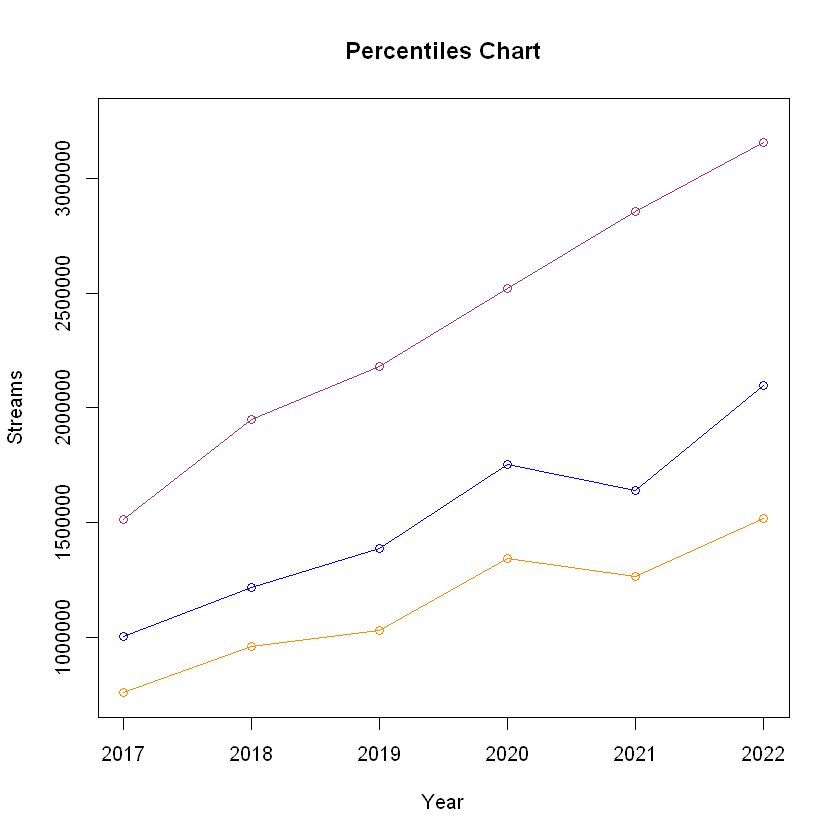

In [35]:
plot(x= year, y = quantile_25percentile_trend,type = "o",col = "darkorange", xlab = "Year", ylab = "Streams", main = "Percentiles Chart", ylim = c(750000, 3250000))
lines(x = year, y = quantile_50percentile_trend, type = "o", col = "blue")
lines(x = year, y = quantile_75percentile_trend, type = "o", col = "maroon")

The 50th and 75th percentiles do not increase much but the 25th percentile increases by a lot each year. This may be due to the large influx in streams for Christmas songs each year. Hence, we will now separate the dataset into two components: Christmas and non-Christmas songs to get a better analysis of songs.

## Splitting the Dataset

In [36]:
christmas_songs_2017 <- christmas_2017_updated %>% filter(christmas_song == 'yes')
non_christmas_songs_2017 <- christmas_2017_updated %>% filter(christmas_song == 'no')

christmas_songs_2018 <- christmas_2018_updated %>% filter(christmas_song == 'yes')
non_christmas_songs_2018 <- christmas_2018_updated %>% filter(christmas_song == 'no')

christmas_songs_2019 <- christmas_2019_updated %>% filter(christmas_song == 'yes')
non_christmas_songs_2019 <- christmas_2019_updated %>% filter(christmas_song == 'no')

christmas_songs_2020 <- christmas_2020_updated %>% filter(christmas_song == 'yes')
non_christmas_songs_2020 <- christmas_2020_updated %>% filter(christmas_song == 'no')

christmas_songs_2021 <- christmas_2021_updated %>% filter(christmas_song == 'yes')
non_christmas_songs_2021 <- christmas_2021_updated %>% filter(christmas_song == 'no')

christmas_songs_2022 <- christmas_2022_updated %>% filter(christmas_song == 'yes')
non_christmas_songs_2022 <- christmas_2022_updated %>% filter(christmas_song == 'no')

We shall now analyse each set with the same graphical and visualisation tools

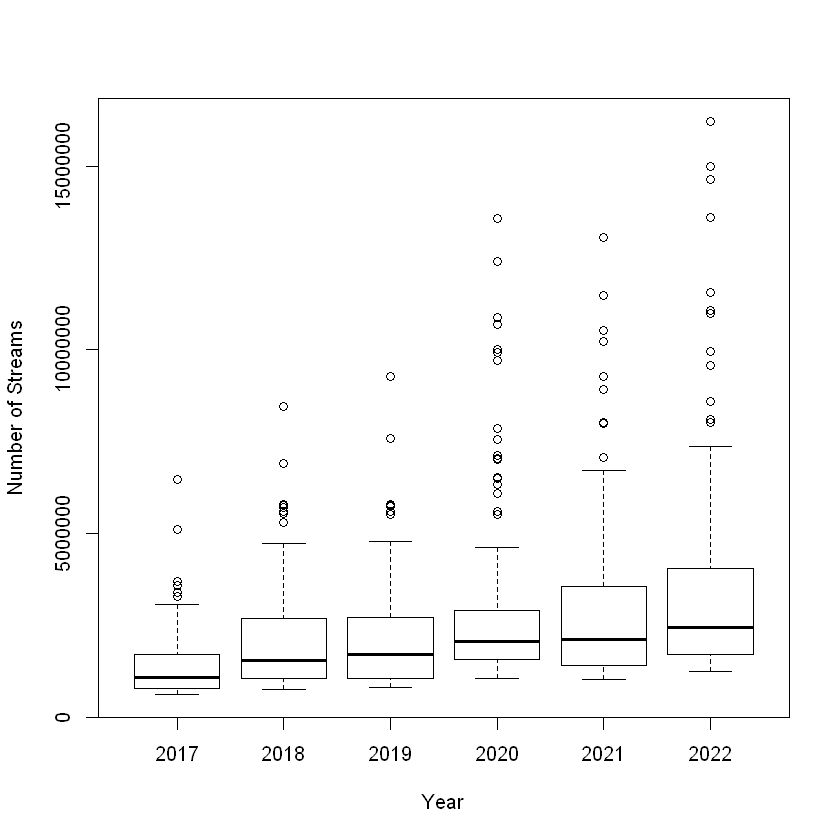

In [42]:
# Boxplot of Streams per Year for Christmas Songs
data <- data.frame(X = c(christmas_songs_2017$streams,
                         christmas_songs_2018$streams,
                         christmas_songs_2019$streams,
                         christmas_songs_2020$streams,
                         christmas_songs_2021$streams,
                         christmas_songs_2022$streams),
                   Grp = rep(c("2017","2018", "2019", "2020", "2021", "2022"),
                             times=c(103,116,122,132,131,130))) # As each subset dataset has different sizes,
                        # this is done to allow the boxplot to identify which data point goes where

options(scipen=999)
boxplot(X~Grp,data=data, ylab = "Number of Streams", xlab = "Year")

In [43]:
quantiles_christmas_2017 <- quantile(christmas_songs_2017$streams, prob = c(0.25,0.5,0.75))
christmas_mean_2017 <- mean(christmas_songs_2017$streams)
print(paste("The top 25% of Christmas songs on the Global Spotify Chart 25/12/2017 have at least", quantiles_christmas_2017[3], "streams"))
print(paste("The top 50% of Christmas songs on the Global Spotify Chart 25/12/2017 have at least", quantiles_christmas_2017[2], "streams"))
print(paste("The top 75% of Christmas songs on the Global Spotify Chart 25/12/2017 have at least", quantiles_christmas_2017[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2017 is", christmas_mean_2017, "streams"))

[1] "The top 25% of Christmas songs on the Global Spotify Chart 25/12/2017 have at least 1716577.5 streams"
[1] "The top 50% of Christmas songs on the Global Spotify Chart 25/12/2017 have at least 1092607 streams"
[1] "The top 75% of Christmas songs on the Global Spotify Chart 25/12/2017 have at least 795549.5 streams"
[1] "The average number of streams on the Global Spotify Chart 25/12/2017 is 1430813.90291262 streams"


In [44]:
quantiles_christmas_2018 <- quantile(christmas_songs_2018$streams, prob = c(0.25,0.5,0.75))
christmas_mean_2018 <- mean(christmas_songs_2018$streams)
print(paste("The top 25% of Christmas songs on the Global Spotify Chart 25/12/2018 have at least", quantiles_christmas_2018[3], "streams"))
print(paste("The top 50% of Christmas songs on the Global Spotify Chart 25/12/2018 have at least", quantiles_christmas_2018[2], "streams"))
print(paste("The top 75% of Christmas songs on the Global Spotify Chart 25/12/2018 have at least", quantiles_christmas_2018[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2018 is", christmas_mean_2018, "streams"))

[1] "The top 25% of Christmas songs on the Global Spotify Chart 25/12/2018 have at least 2665065 streams"
[1] "The top 50% of Christmas songs on the Global Spotify Chart 25/12/2018 have at least 1539758 streams"
[1] "The top 75% of Christmas songs on the Global Spotify Chart 25/12/2018 have at least 1061211 streams"
[1] "The average number of streams on the Global Spotify Chart 25/12/2018 is 2075825.9137931 streams"


In [45]:
quantiles_christmas_2019 <- quantile(christmas_songs_2019$streams, prob = c(0.25,0.5,0.75))
christmas_mean_2019 <- mean(christmas_songs_2019$streams)
print(paste("The top 25% of Christmas songs on the Global Spotify Chart 25/12/2019 have at least", quantiles_christmas_2019[3], "streams"))
print(paste("The top 50% of Christmas songs on the Global Spotify Chart 25/12/2019 have at least", quantiles_christmas_2019[2], "streams"))
print(paste("The top 75% of Christmas songs on the Global Spotify Chart 25/12/2019 have at least", quantiles_christmas_2019[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2019 is", christmas_mean_2019, "streams"))

[1] "The top 25% of Christmas songs on the Global Spotify Chart 25/12/2019 have at least 2728191.5 streams"
[1] "The top 50% of Christmas songs on the Global Spotify Chart 25/12/2019 have at least 1706405.5 streams"
[1] "The top 75% of Christmas songs on the Global Spotify Chart 25/12/2019 have at least 1075989.5 streams"
[1] "The average number of streams on the Global Spotify Chart 25/12/2019 is 2156247.39344262 streams"


In [46]:
quantiles_christmas_2020 <- quantile(christmas_songs_2020$streams, prob = c(0.25,0.5,0.75))
christmas_mean_2020 <- mean(christmas_songs_2020$streams)
print(paste("The top 25% of Christmas songs on the Global Spotify Chart 25/12/2020 have at least", quantiles_christmas_2020[3], "streams"))
print(paste("The top 50% of Christmas songs on the Global Spotify Chart 25/12/2020 have at least", quantiles_christmas_2020[2], "streams"))
print(paste("The top 75% of Christmas songs on the Global Spotify Chart 25/12/2020 have at least", quantiles_christmas_2020[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2020 is", christmas_mean_2020, "streams"))

[1] "The top 25% of Christmas songs on the Global Spotify Chart 25/12/2020 have at least 2889387.25 streams"
[1] "The top 50% of Christmas songs on the Global Spotify Chart 25/12/2020 have at least 2057995 streams"
[1] "The top 75% of Christmas songs on the Global Spotify Chart 25/12/2020 have at least 1573016.25 streams"
[1] "The average number of streams on the Global Spotify Chart 25/12/2020 is 2968578.37878788 streams"


In [47]:
quantiles_christmas_2021 <- quantile(christmas_songs_2021$streams, prob = c(0.25,0.5,0.75))
christmas_mean_2021 <- mean(christmas_songs_2021$streams)
print(paste("The top 25% of Christmas songs on the Global Spotify Chart 25/12/2021 have at least", quantiles_christmas_2021[3], "streams"))
print(paste("The top 50% of Christmas songs on the Global Spotify Chart 25/12/2021 have at least", quantiles_christmas_2021[2], "streams"))
print(paste("The top 75% of Christmas songs on the Global Spotify Chart 25/12/2021 have at least", quantiles_christmas_2021[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2021 is", christmas_mean_2021, "streams"))

[1] "The top 25% of Christmas songs on the Global Spotify Chart 25/12/2021 have at least 3551610 streams"
[1] "The top 50% of Christmas songs on the Global Spotify Chart 25/12/2021 have at least 2117627 streams"
[1] "The top 75% of Christmas songs on the Global Spotify Chart 25/12/2021 have at least 1426331 streams"
[1] "The average number of streams on the Global Spotify Chart 25/12/2021 is 2997262.44274809 streams"


In [48]:
quantiles_christmas_2022 <- quantile(christmas_songs_2022$streams, prob = c(0.25,0.5,0.75))
christmas_mean_2022 <- mean(christmas_songs_2022$streams)
print(paste("The top 25% of Christmas songs on the Global Spotify Chart 25/12/2022 have at least", quantiles_christmas_2022[3], "streams"))
print(paste("The top 50% of Christmas songs on the Global Spotify Chart 25/12/2022 have at least", quantiles_christmas_2022[2], "streams"))
print(paste("The top 75% of Christmas songs on the Global Spotify Chart 25/12/2022 have at least", quantiles_christmas_2022[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2022 is", christmas_mean_2022, "streams"))

[1] "The top 25% of Christmas songs on the Global Spotify Chart 25/12/2022 have at least 4057563.75 streams"
[1] "The top 50% of Christmas songs on the Global Spotify Chart 25/12/2022 have at least 2455911.5 streams"
[1] "The top 75% of Christmas songs on the Global Spotify Chart 25/12/2022 have at least 1727174.25 streams"
[1] "The average number of streams on the Global Spotify Chart 25/12/2022 is 3597251.25384615 streams"


In [52]:
christmas_mean_trend <- c(christmas_mean_2017, christmas_mean_2018, christmas_mean_2019, christmas_mean_2020, christmas_mean_2021, christmas_mean_2022)

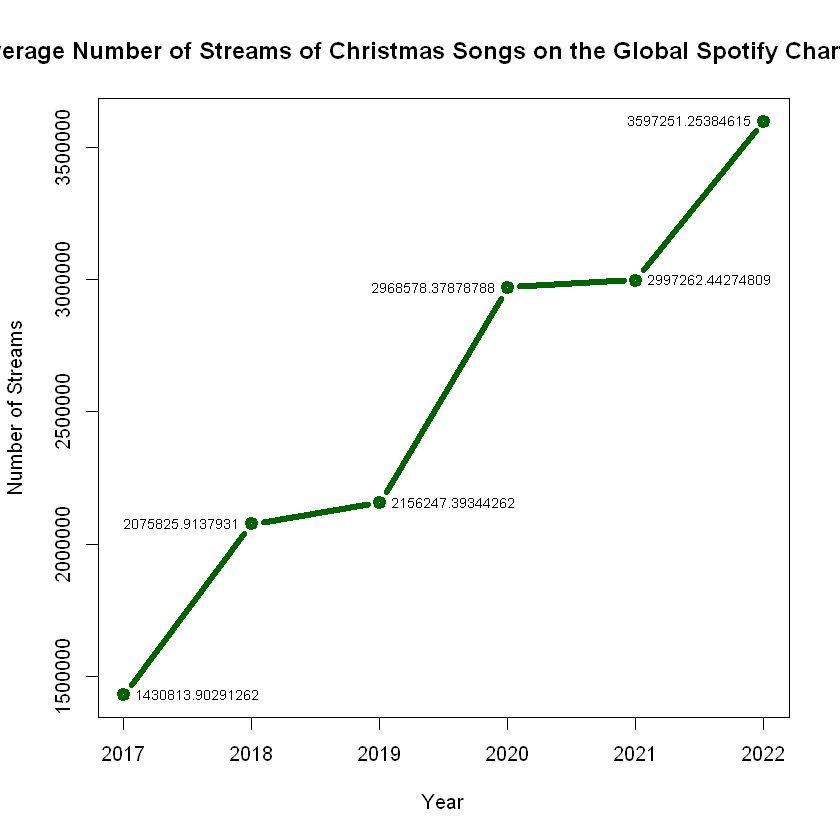

In [54]:
pos_vector <- rep(4, length(christmas_mean_trend))
pos_vector[christmas_mean_trend %in% c(christmas_mean_2018, christmas_mean_2020, christmas_mean_2022)] <- 2
options(scipen=999)
plot(year, christmas_mean_trend, type="b", col="darkgreen", lwd=5, xlab="Year", ylab="Number of Streams", main="Average Number of Streams of Christmas Songs on the Global Spotify Chart 25/12")
text(year, christmas_mean_trend, labels=christmas_mean_trend, cex= 0.7, pos=pos_vector)

In [ ]:
quantile_25percentile_trend <- c(quantiles_2017[1], quantiles_2018[1], quantiles_2019[1], quantiles_2020[1], quantiles_2021[1], quantiles_2022[1])
quantile_50percentile_trend <- c(quantiles_2017[2], quantiles_2018[2], quantiles_2019[2], quantiles_2020[2], quantiles_2021[2], quantiles_2022[2])
quantile_75percentile_trend <- c(quantiles_2017[3], quantiles_2018[3], quantiles_2019[3], quantiles_2020[3], quantiles_2021[3], quantiles_2022[3])

In [ ]:
plot(x= year, y = quantile_25percentile_trend,type = "o",col = "darkorange", xlab = "Year", ylab = "Streams", main = "Percentiles Chart", ylim = c(750000, 3250000))
lines(x = year, y = quantile_50percentile_trend, type = "o", col = "blue")
lines(x = year, y = quantile_75percentile_trend, type = "o", col = "maroon")

In [ ]:
# Boxplot of Streams per Year for Christmas Songs
data <- data.frame(X = c(non_christmas_songs_2017$streams,
                         non_christmas_songs_2018$streams,
                         non_christmas_songs_2019$streams,
                         non_christmas_songs_2020$streams,
                         non_christmas_songs_2021$streams,
                         non_christmas_songs_2022$streams),
                   Grp = rep(c("2017","2018", "2019", "2020", "2021", "2022"),
                             times=c(200-103,200-116,200-122,200-132,200-131,200-130))) # As each subset dataset has different sizes,
                        # this is done to allow the boxplot to identify which data point goes where

options(scipen=999)
boxplot(X~Grp,data=data, ylab = "Number of Streams", xlab = "Year")

In [ ]:
quantiles_non_christmas_2017 <- quantile(non_christmas_songs_2017$streams, prob = c(0.25,0.5,0.75))
non_christmas_mean_2017 <- mean(non_christmas_songs_2017$streams)
print(paste("The top 25% of non-Christmas songs on the Global Spotify Chart 25/12/2017 have at least", quantiles_non_christmas_2017[3], "streams"))
print(paste("The top 50% of non-Christmas songs on the Global Spotify Chart 25/12/2017 have at least", quantiles_non_christmas_2017[2], "streams"))
print(paste("The top 75% of non-Christmas songs on the Global Spotify Chart 25/12/2017 have at least", quantiles_non_christmas_2017[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2017 is", non_christmas_mean_2017, "streams"))

In [ ]:
quantiles_non_christmas_2018 <- quantile(non_christmas_songs_2018$streams, prob = c(0.25,0.5,0.75))
non_christmas_mean_2018 <- mean(non_christmas_songs_2018$streams)
print(paste("The top 25% of non-Christmas songs on the Global Spotify Chart 25/12/2018 have at least", quantiles_non_christmas_2018[3], "streams"))
print(paste("The top 50% of non-Christmas songs on the Global Spotify Chart 25/12/2018 have at least", quantiles_non_christmas_2018[2], "streams"))
print(paste("The top 75% of non-Christmas songs on the Global Spotify Chart 25/12/2018 have at least", quantiles_non_christmas_2018[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2018 is", non_christmas_mean_2018, "streams"))

In [ ]:
quantiles_non_christmas_2019 <- quantile(non_christmas_songs_2019$streams, prob = c(0.25,0.5,0.75))
non_christmas_mean_2019 <- mean(non_christmas_songs_2019$streams)
print(paste("The top 25% of non-Christmas songs on the Global Spotify Chart 25/12/2019 have at least", quantiles_non_christmas_2019[3], "streams"))
print(paste("The top 50% of non-Christmas songs on the Global Spotify Chart 25/12/2019 have at least", quantiles_non_christmas_2019[2], "streams"))
print(paste("The top 75% of non-Christmas songs on the Global Spotify Chart 25/12/2019 have at least", quantiles_non_christmas_2019[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2019 is", non_christmas_mean_2019, "streams"))

In [ ]:
quantiles_non_christmas_2020 <- quantile(non_christmas_songs_2020$streams, prob = c(0.25,0.5,0.75))
non_christmas_mean_2020 <- mean(non_christmas_songs_2020$streams)
print(paste("The top 25% of non-Christmas songs on the Global Spotify Chart 25/12/2020 have at least", quantiles_non_christmas_2020[3], "streams"))
print(paste("The top 50% of non-Christmas songs on the Global Spotify Chart 25/12/2020 have at least", quantiles_non_christmas_2020[2], "streams"))
print(paste("The top 75% of non-Christmas songs on the Global Spotify Chart 25/12/2020 have at least", quantiles_non_christmas_2020[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2020 is", non_christmas_mean_2020, "streams"))

In [ ]:
quantiles_non_christmas_2021 <- quantile(non_christmas_songs_2021$streams, prob = c(0.25,0.5,0.75))
non_christmas_mean_2021 <- mean(non_christmas_songs_2021$streams)
print(paste("The top 25% of non-Christmas songs on the Global Spotify Chart 25/12/2021 have at least", quantiles_non_christmas_2021[3], "streams"))
print(paste("The top 50% of non-Christmas songs on the Global Spotify Chart 25/12/2021 have at least", quantiles_non_christmas_2021[2], "streams"))
print(paste("The top 75% of non-Christmas songs on the Global Spotify Chart 25/12/2021 have at least", quantiles_non_christmas_2021[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2021 is", non_christmas_mean_2021, "streams"))

In [ ]:
quantiles_non_christmas_2022 <- quantile(non_christmas_songs_2022$streams, prob = c(0.25,0.5,0.75))
non_christmas_mean_2022 <- mean(non_christmas_songs_2022$streams)
print(paste("The top 25% of non-Christmas songs on the Global Spotify Chart 25/12/2022 have at least", quantiles_non_christmas_2022[3], "streams"))
print(paste("The top 50% of non-Christmas songs on the Global Spotify Chart 25/12/2022 have at least", quantiles_non_christmas_2022[2], "streams"))
print(paste("The top 75% of non-Christmas songs on the Global Spotify Chart 25/12/2022 have at least", quantiles_non_christmas_2022[1], "streams"))
print(paste("The average number of streams on the Global Spotify Chart 25/12/2022 is", non_christmas_mean_2022, "streams"))

In [ ]:
non_christmas_mean_trend <- c(non_christmas_mean_2017, non_christmas_mean_2018, non_christmas_mean_2019, non_christmas_mean_2020, non_christmas_mean_2021, non_christmas_mean_2022)

In [ ]:
pos_vector <- rep(4, length(non_christmas_mean_trend))
pos_vector[non_christmas_mean_trend %in% c(non_christmas_mean_2018, non_christmas_mean_2020, non_christmas_mean_2022)] <- 2
options(scipen=999)
plot(year, non_christmas_mean_trend, type="b", col="darkgreen", lwd=5, xlab="Year", ylab="Number of Streams", main="Average Number of Streams of non-Christmas Songs on the Global Spotify Chart 25/12")
text(year, non_christmas_mean_trend, labels=non_christmas_mean_trend, cex= 0.7, pos=pos_vector)

In [ ]:
# Note to self:
# May consider manually adding time stamps to analyse length range of songs

# Test the null hypothesis by looking at the percentage difference in number of streams between non-christmas songs one day before Christmas
# Only include songs that make it onto the Spotify Chart. So we need to extract these songs out
# Take the percentage difference and add it to the new column
# Take the sample mean of percentage difference
# Take the sample variance of the percentage difference
# Sort the percentage differences and plot them in a histogram
# Determine possible distribution
# Look at the significance level of the sample mean to see if Christmas songs impact the stream counts of non-Christmas songs.